In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,SeparableConv2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [24]:
## data path 

In [2]:
train_dir = r"F:\pneumonia\000 P R O J E C T S\pneumonia\New folder\dataset\train"
val_dir = r"F:\pneumonia\000 P R O J E C T S\pneumonia\New folder\dataset\val"


In [26]:
## augmentation

In [3]:
img_rows = 224
img_cols = 224
## data augmentation
batch_size = 16

train_datagen = ImageDataGenerator(
      rescale=1./255,
      #featurewise_center=False,  # set input mean to 0 over the dataset
      #samplewise_center=False,  # set each sample mean to 0
      #featurewise_std_normalization=False,  # divide inputs by std of the dataset
      #samplewise_std_normalization=False,  # divide each input by its std
      rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip= False,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        val_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)



Found 31064 images belonging to 2 classes.
Found 5349 images belonging to 2 classes.


In [16]:
##

In [3]:
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D



model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(224,224,1)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#
model.add(SeparableConv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D((2,2) ))

model.add(SeparableConv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D((2,2) ))
#

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2 , activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)       

In [8]:
##

In [7]:
from keras import optimizers
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint(r"F:\pneumonia\000 P R O J E C T S\pneumonia\New folder\codes\checkpoints\custom_pneumonia_01.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 1,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate

#opt = optimizers.Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy'])

nb_train_samples = 31064
nb_validation_samples = 5349
epochs = 25
batch_size = 16



In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size
    )

Epoch 1/25
1941/1941 [==============================] - 812s 418ms/step - loss: 0.5405 - accuracy: 0.7390 - val_loss: 0.7040 - val_accuracy: 0.7350

Epoch 00001: val_loss improved from inf to 0.70395, saving model to F:\pneumonia\000 P R O J E C T S\pneumonia\New folder\codes\checkpoints\custom_pneumonia_01.h5
Epoch 2/25
1941/1941 [==============================] - 831s 428ms/step - loss: 0.5021 - accuracy: 0.7611 - val_loss: 0.4883 - val_accuracy: 0.8018

Epoch 00002: val_loss improved from 0.70395 to 0.48834, saving model to F:\pneumonia\000 P R O J E C T S\pneumonia\New folder\codes\checkpoints\custom_pneumonia_01.h5
Epoch 3/25
1941/1941 [==============================] - 844s 435ms/step - loss: 0.4711 - accuracy: 0.7787 - val_loss: 0.7784 - val_accuracy: 0.5942

Epoch 00003: val_loss did not improve from 0.48834

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 4/25
1941/1941 [==============================] - 806s 415ms/step - loss: 0.4335 - a

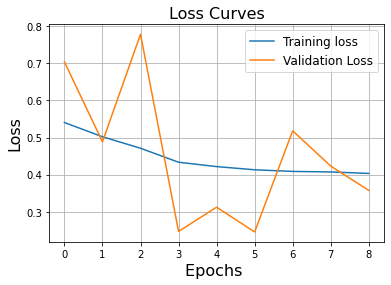

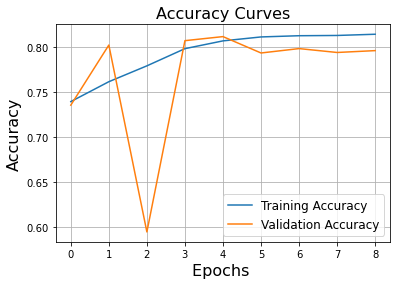

In [12]:
# plot the model loss and accuracy
import matplotlib.pyplot as plt

# Loss Curves
#plt.figure(figsize=[10,8])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.savefig("loss.png")
plt.show()
 
# Accuracy Curves
#plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.savefig("acc.png")
plt.show()

In [2]:
##


Found 5349 images belonging to 2 classes.
Confusion Matrix
[[3474  659]
 [ 449  767]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4133
           1       0.54      0.63      0.58      1216

    accuracy                           0.79      5349
   macro avg       0.71      0.74      0.72      5349
weighted avg       0.81      0.79      0.80      5349



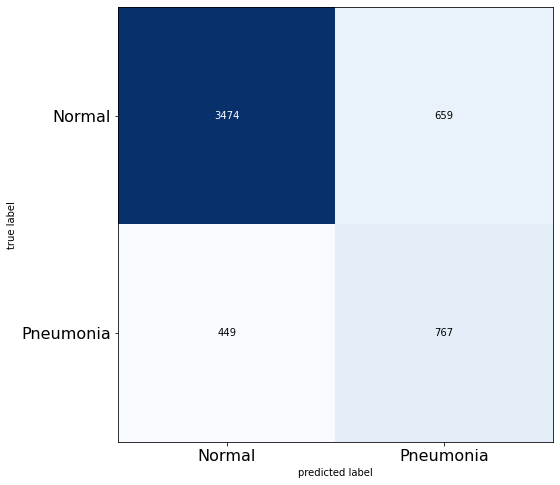

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
import pickle 

validation_generator = validation_datagen.flow_from_directory(
        val_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


pred = model.predict(validation_generator)
pred = np.argmax(pred,axis = 1) 

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, pred, target_names=target_names))

CM = confusion_matrix(validation_generator.classes, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(12, 8))
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.savefig("confusion matrix.png")
plt.show()


In [7]:
!conda install pydot-ng

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - pydot-ng

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




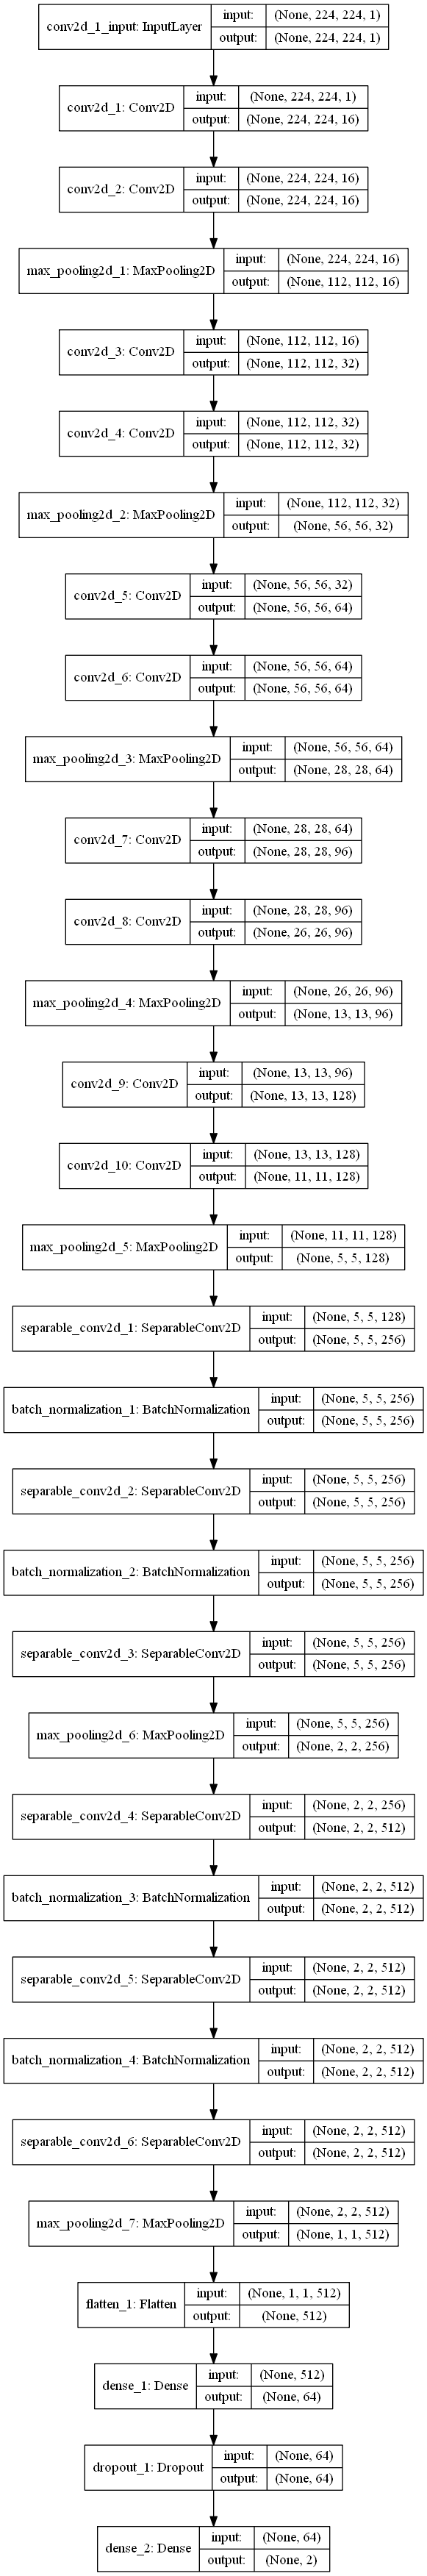

In [13]:
from keras import models
from keras import layers
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file="neural_network.png")

In [14]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()